# Regression Use Case  
---
This use case is to demonstrate the machine learning **pipeline**: (1) data loading, (2) data cleaning, (3) feature selection, (4) ML modeling, (5) evaluation, and (6) model application. At the same time, we also display the important graphs to visualize the insight.

### use case:
    Suppose we have an very expensive experiment in which we need to collect some data and save it for data analysis. Most of time, data collected is reliable. Unfortunately, one of the meter did not function well occasssionally. Some data from this meter is not reliable but marked in some way. We want to filter out the bad data. Instead of discarding them, we want to correct them and save them for later analysis. 
    
Now what can we do? The first thing we can try is to use the good data to build a model, then use this model and other varaibles to predict or correct the bad data. 

In this use case, column with bad data is considered as the response variable y. The others are considered as independent variables x1, x2, etc. We use the good data to build models and figure out the relation among these variables in good data. We will try several different models. Once we have the best model, we can predict/correct the bad data using this model and other variables. 

Here is the common pipeline as example, even though some steps are ignored intentionly.    

**Part I Preprocessing Steps**
 * Loading data as dataframe
 * Removing irrelavent featers by drop('column_name))
 * Split data into good and bad datasets

**Part II Regression by different models**
   * Normalization
   * Correlation analysis
   * Feature selection
   * Algorithm investigation
   * Evaluation  
     
**Part III Analysis**
   * error distribution
   * z test and p value

# Part I data preparation
----
 - checking invalid data, missing values, NaN, outliers  
 - filter out bad data
 - normalization
 - correlation analysis
 - feature selection


In [1]:
# loading csv data
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics  

In [2]:
# reading csv file  
df= pd.read_csv("datasets/use_case.csv") 
df.head()

,x1,x2,x3,x4,x5,x6,y
0,7300.5,0,0,72.1918,2.1279,0.1998,2.5135
1,7301.0,0,0,73.1849,2.1415,0.2167,2.4987
2,7301.5,0,0,71.4150,1.9929,0.2241,2.5093
3,7302.0,0,0,70.1263,1.8502,0.2194,2.5895
4,7302.5,0,0,66.2725,1.8368,0.2181,2.6078


In [3]:
# check missing or NaN 
df.describe()

# not happened

,x1,x2,x3,x4,x5,x6,y
count,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000
mean,8950.000000,0.178967,0.065010,71.939306,1.826081,0.189902,2.552072
std,952.555773,0.383353,0.246562,9.327663,0.609379,0.072950,0.132362
min,7300.500000,0.000000,0.000000,47.619600,0.587000,0.014700,1.500000
25%,8125.250000,0.000000,0.000000,66.113850,1.387200,0.143450,2.516600
50%,8950.000000,0.000000,0.000000,70.616100,1.727400,0.187700,2.574400
75%,9774.750000,0.000000,0.000000,78.717500,2.155550,0.231800,2.618950
max,10599.500000,1.000000,1.000000,99.231100,5.000000,0.411000,2.851300


## filter out the  bad data

**Bad data happens only the column y**  
   * **If x2 = 1, data is bad**  
   * **If x3 = 1, data is bad too**  
  
   * **Only if x2 and x3 are zero, y is reliable.**



In [4]:
# select the bad data rows
df_bad = df[(df.x2==1) | (df.x3==1)]
df_bad.shape


(1610, 7)

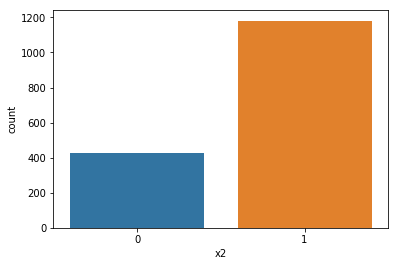

In [5]:
sns.countplot(data=df_bad, x = 'x2')
# we got ~ 1200 rows identified by x2 =1

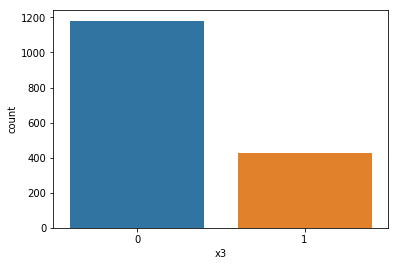

In [6]:
sns.countplot(data=df_bad, x = 'x3')
# we got ~ 400 rows identified by x3 = 1

In [7]:
# drop columns 'x2' and 'x3' in bad dataset, because they are irrelevant to the prediction

df_bad= df_bad.drop(['x2', 'x3'], axis=1)
df_bad.head()
# save  it to local disk
# df_bad.to_csv('df_bad.csv')

,x1,x4,x5,x6,y
124,7362.5,64.1073,2.2512,0.2040,2.5465
125,7363.0,62.5372,2.4572,0.1903,2.6179
126,7363.5,59.8264,2.6888,0.1478,2.6819
127,7364.0,61.2902,2.1688,0.1045,2.6870
128,7364.5,61.4180,1.8550,0.0906,2.7036


In [8]:
# build the good dataset by removing all bad rows from the df
df_good = df[df.x2 != 1]
df_good = df_good[df_good.x3 != 1]
df_good.shape

(4989, 7)

In [9]:
# drop columns: x2 and x3 
df_4 = df_good.drop(['x2', 'x3'], axis=1)
print(df_4.head())

       x1       x4      x5      x6       y
0  7300.5  72.1918  2.1279  0.1998  2.5135
1  7301.0  73.1849  2.1415  0.2167  2.4987
2  7301.5  71.4150  1.9929  0.2241  2.5093
3  7302.0  70.1263  1.8502  0.2194  2.5895
4  7302.5  66.2725  1.8368  0.2181  2.6078


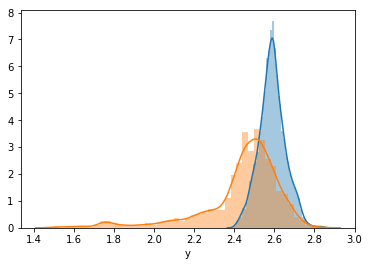

In [10]:
# histgraph comparison
sns.distplot(df_good['y']);
sns.distplot(df_bad['y']);

In [11]:
# save the max, min of y for re-scaling back
max_y = df_4['y'].max(axis = 0)
min_y = df_4['y'].min(axis = 0)
print("min_y =", min_y, " max_y=", max_y)

# normalization
df_norm=(df_4 - df_4.min())/(df_4.max()-df_4.min())
df_norm.head()

min_y = 2.4  max_y= 2.8513


,x1,x4,x5,x6,y
0,0.000000,0.510796,0.336299,0.467542,0.251496
1,0.000152,0.531440,0.339442,0.510230,0.218702
2,0.000303,0.494648,0.305102,0.528921,0.242189
3,0.000455,0.467859,0.272126,0.517050,0.419898
4,0.000606,0.387748,0.269030,0.513766,0.460448


In [12]:
# check the pairwise relations
df_norm.corr(method ='pearson') 

,x1,x4,x5,x6,y
x1,1.000000,-0.170148,0.158151,-0.278650,0.268664
x4,-0.170148,1.000000,-0.598096,0.806802,-0.572310
x5,0.158151,-0.598096,1.000000,-0.559380,0.309873
x6,-0.278650,0.806802,-0.559380,1.000000,-0.722595
y,0.268664,-0.572310,0.309873,-0.722595,1.000000


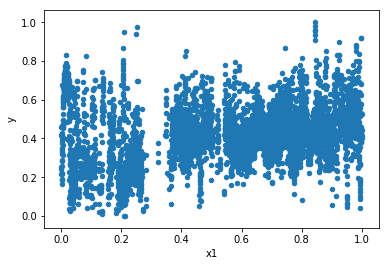

In [13]:
#plot y ~ x relation
df_norm.plot.scatter(x='x1', y='y');

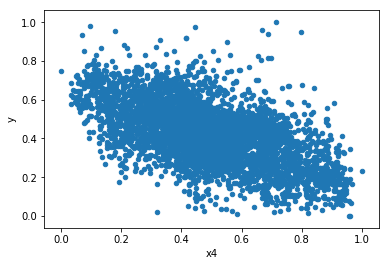

In [14]:
df_norm.plot.scatter(x='x4', y='y');

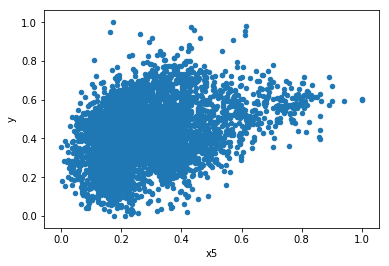

In [15]:
df_norm.plot.scatter(x='x5', y='y');

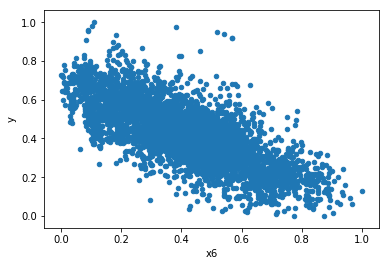

In [16]:
df_norm.plot.scatter(x='x6', y='y');

## Now we can see:

 1. good linear relations:  x4, x6
 2. OK: x5
 3. non-linear relation: x1

### Feature selection

In [17]:
# keep intact dataframe has 4 features and target for later use
# we will work on its copy
df_0=  df_norm
df_0.head()

,x1,x4,x5,x6,y
0,0.000000,0.510796,0.336299,0.467542,0.251496
1,0.000152,0.531440,0.339442,0.510230,0.218702
2,0.000303,0.494648,0.305102,0.528921,0.242189
3,0.000455,0.467859,0.272126,0.517050,0.419898
4,0.000606,0.387748,0.269030,0.513766,0.460448


In [18]:
# for training features: X only
# for target: y only


# Kept features: x4, x5, x6 only, as  x1 is not good feature
# If we do feature selection:
# we will have all three, any two features, and any one feature: 7 combinations

X=df_0[["x4", "x5","x6"]]
y=df_0.iloc[:, -1]

# print(X.head())
# print( y.head())


# Part II. ML Regression Analysis
----
### The response  variable y is continous in this use case, thus we will use regression

We will only work on good data set: X (3 features) and target column y. We select ONE algorithm to get model, then we evaluate it and compare with others.


<img src="images/ml_flowchart.png" width="600" height="500">


# 1. Split data into training set and testing set 

In [19]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


## Define function used to evaluate the model

In [20]:
# accuracy checking
def evaluation(y_test, y_pred):
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

    # find scaled data error
    df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error': (y_test - y_pred)})

    # rescale back to the original scale 
    df_real = df_test*(max_y - min_y) + min_y
    df_real["Dif"] = df_real["Actual"] -df_real["Predicted"]
    
    print("\nComparison of Actual and Predicted y")
    print("------------------------------------")
    print(df_real[[ "Actual", "Predicted", "Dif"]].head(10))
    df_real.Dif.plot.hist();
    
    #df_real.Dif.describe()
    return df_real

## 2.1. Model_1, Liear Regression

Mean Squared Error: 0.009477429571915904

Comparison of Actual and Predicted y
------------------------------------
      Actual  Predicted       Dif
2973  2.5857   2.601061 -0.015361
1743  2.5368   2.555290 -0.018490
123   2.5783   2.594412 -0.016112
3878  2.5738   2.566115  0.007685
5454  2.5890   2.579210  0.009790
3004  2.5971   2.566115  0.030985
4589  2.5549   2.583981 -0.029081
1633  2.6369   2.521497  0.115403
4781  2.5361   2.625309 -0.089209
3964  2.5547   2.571249 -0.016549


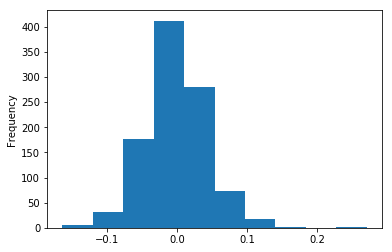

In [21]:
# use linear regressoion
from sklearn.linear_model import LinearRegression
model = LinearRegression()  

#training the algorithm)
model.fit(X_train, y_train)
# prediction
y_pred = model.predict(X_test)

# evaluation
df_real= evaluation(y_test, y_pred)

## 2.2. Model_2,  LASSO and Ridge

Mean Squared Error: 0.009575921542981215

Comparison of Actual and Predicted y
------------------------------------
      Actual  Predicted       Dif
2973  2.5857   2.602114 -0.016414
1743  2.5368   2.555114 -0.018314
123   2.5783   2.596898 -0.018598
3878  2.5738   2.569161  0.004639
5454  2.5890   2.576294  0.012706
3004  2.5971   2.569385  0.027715
4589  2.5549   2.591224 -0.036324
1633  2.6369   2.526201  0.110699
4781  2.5361   2.625480 -0.089380
3964  2.5547   2.573199 -0.018499


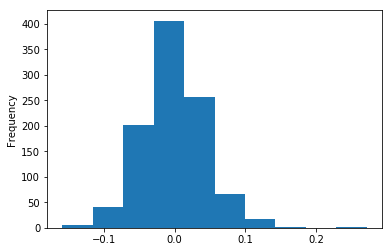

In [22]:
#LASSO
# from sklearn.linear_model import Lasso
# lassoReg = Lasso(alpha=0.3, normalize=True)
# lassoReg.fit(X_train,y_train)
# y_pred = lassoReg.predict(X_test)


## Ridge 
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.05, normalize=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# evaluation
df_real = evaluation(y_test, y_pred)

## 2.3. Model_3: k-NN:

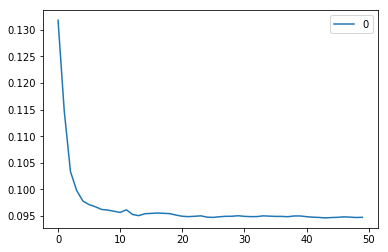

In [23]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
   # print('Mean Squared Error for k= ' , K , 'is:', error)

#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

# build model with K = 35
model = neighbors.KNeighborsRegressor(n_neighbors = 35)

model.fit(X_train, y_train)  #fit the model
y_pred=model.predict(X_test) #make prediction on test set


Mean Squared Error: 0.009019669000173708

Comparison of Actual and Predicted y
------------------------------------
      Actual  Predicted       Dif
2973  2.5857   2.600191 -0.014491
1743  2.5368   2.565686 -0.028886
123   2.5783   2.589297 -0.010997
3878  2.5738   2.581166 -0.007366
5454  2.5890   2.593929 -0.004929
3004  2.5971   2.543417  0.053683
4589  2.5549   2.590574 -0.035674
1633  2.6369   2.532934  0.103966
4781  2.5361   2.616709 -0.080609
3964  2.5547   2.565351 -0.010651


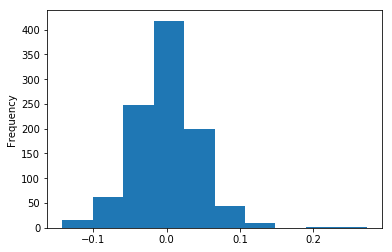

In [24]:
# evaluation
df_real = evaluation(y_test, y_pred)

## 2.4. Model_4, Neural Network

Mean Squared Error: 0.009762245689452458

Comparison of Actual and Predicted y
------------------------------------
      Actual  Predicted       Dif
2973  2.5857   2.599848 -0.014148
1743  2.5368   2.553262 -0.016462
123   2.5783   2.598509 -0.020209
3878  2.5738   2.567578  0.006222
5454  2.5890   2.574132  0.014868
3004  2.5971   2.572596  0.024504
4589  2.5549   2.594459 -0.039559
1633  2.6369   2.528813  0.108087
4781  2.5361   2.626591 -0.090491
3964  2.5547   2.574299 -0.019599


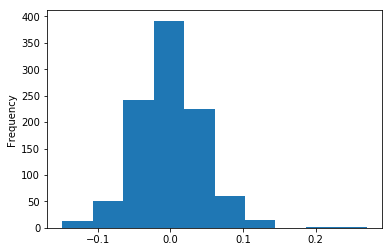

In [25]:
# ANN
from sklearn.neural_network import MLPRegressor

# need to tune the activation function and the hidden size/structure
model = MLPRegressor(random_state=0, activation='relu', hidden_layer_sizes=100)

#model = MLPRegressor(random_state=0, activation='tanh', hidden_layer_sizes=(16,8))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluation
df_real = evaluation(y_test, y_pred)

## 2.5. Model_5, Bayesian 

Mean Squared Error: 0.00947789136799821

Comparison of Actual and Predicted y
------------------------------------
      Actual  Predicted       Dif
2973  2.5857   2.601077 -0.015377
1743  2.5368   2.555284 -0.018484
123   2.5783   2.594449 -0.016149
3878  2.5738   2.566157  0.007643
5454  2.5890   2.579166  0.009834
3004  2.5971   2.566161  0.030939
4589  2.5549   2.584086 -0.029186
1633  2.6369   2.521561  0.115339
4781  2.5361   2.625314 -0.089214
3964  2.5547   2.571276 -0.016576


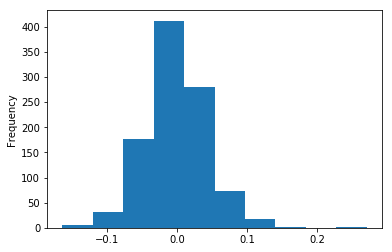

In [26]:
# Bayesian
from sklearn.linear_model import BayesianRidge, LinearRegression
model = BayesianRidge(compute_score=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluation
df_real = evaluation(y_test, y_pred)

## 2.6. Model_6, Kernel Regression

Mean Squared Error: 0.009373296612434351

Comparison of Actual and Predicted y
------------------------------------
      Actual  Predicted       Dif
2973  2.5857   2.601006 -0.015306
1743  2.5368   2.557216 -0.020416
123   2.5783   2.594357 -0.016057
3878  2.5738   2.566685  0.007115
5454  2.5890   2.580183  0.008817
3004  2.5971   2.562723  0.034377
4589  2.5549   2.586904 -0.032004
1633  2.6369   2.515000  0.121900
4781  2.5361   2.625833 -0.089733
3964  2.5547   2.569187 -0.014487


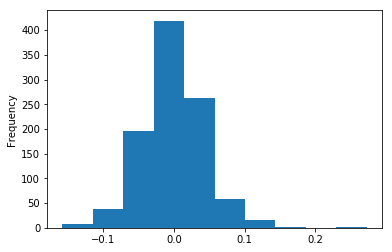

In [27]:
#6. Kernel Regression
from sklearn.kernel_ridge import KernelRidge

model = KernelRidge(kernel ='polynomial', alpha=1.0)
#kr = KernelRidge(kernel ='rbf', alpha=1.0)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# evaluation
df_real = evaluation(y_test, y_pred)

# 3. Evaluation

Actually we did evaluate each model using the MSE after we generate it. If model is not good, we go back to tune the user-defined values. In this notebook, we mainly focused on using different models. By comparing the errors, we noticed that the k-NN is the best model with relative large k, k = 35 in this case. Notice that other model is also good, but we need to tune the them to generate better models.

Normally, we can much more in model evaluation such as cross-validation. To check and accuracy, we can also use other metrics such ROC or AUC to compare models. We will discuss those in other notebooks.


##  Vizualization

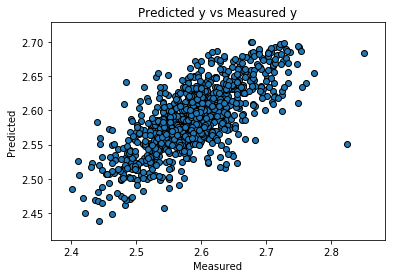

In [28]:
# plotting
fig, ax = plt.subplots()
# plt.xlim([min_4, max_4])
# plt.ylim([min_4, max_4])

ax.scatter(df_real['Actual'], df_real['Predicted'],  edgecolors=(0, 0, 0))
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title("Predicted y vs Measured y")
plt.show()

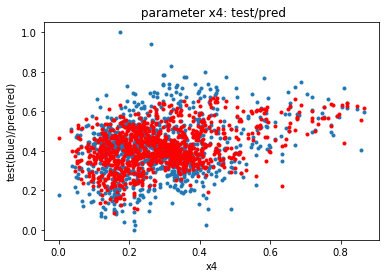

In [29]:
# # More plotting
fig, ax = plt.subplots()
# plt.plot(X_test.iloc[:,0], y_test, '.')
# plt.plot(X_test.iloc[:,0], y_pred, 'r.')
# ax.set_xlabel('Rt')
# ax.set_ylabel('test(blue)/pred(red)')

# More plotting
plt.plot(X_test.iloc[:,1], y_test, '.')
plt.plot(X_test.iloc[:,1], y_pred, 'r.')
ax.set_xlabel('x4')
ax.set_ylabel('test(blue)/pred(red)')
plt.title(" parameter x4: test/pred")
plt.show()

### Optional: Outlier Elimination: 
   * Remove the outliers > 3*st()  

   <code>
     df_narrow = df_0[df_0 -df_0.mean() <= 3.0*df_0.std()]
     x = df_narrow.dropna()
     X=x[["x4", "x5","x6"]]
     y=x.iloc[:, -1]
   </code>

    After Outliers are eliminated, go back to training ( Step 2)

# Part III.  Analysis

We will use k-NN(k=35) model to correct the bad y. Now the problems are: 
 * what are the percentage of data within certain error tolerance
 * how to apply model to the bad data set, make correction from  there
 * how good your model in the real case       

# 1. find error percentile

<img src="images/percentile.png" width="300" height="300">

In [30]:
# find percentile

# 80% of data, left 10%, right 10%, find the quantile value
print(df_real.Dif.quantile([0.10, 0.9]) )
print()

# 90% of data, left 5%, right 5%, find the quantile value
print(df_real.Dif.quantile([0.05, 0.95]) )
print()

# 95% of data, left 2.5%, right 2.5%, find the quantile value
print(df_real.Dif.quantile([0.025, 0.975]) )

# We now check the percentile of the error distribution:

# Error +/- 0.05: 80% data are good
# Error +/- 0.07: 90% data are good
# Error +/- 0.09: 95% data are good

0.1   -0.053065
0.9    0.050214
Name: Dif, dtype: float64

0.05   -0.069326
0.95    0.070951
Name: Dif, dtype: float64

0.025   -0.086208
0.975    0.093102
Name: Dif, dtype: float64


##  2. Apply model

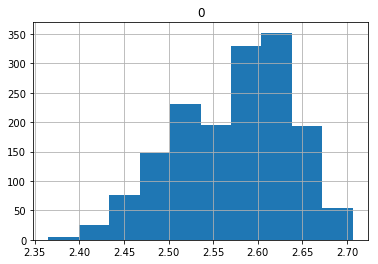

In [31]:
df_bad.head()
#df_bad.shape

# drop the "y" and the "x1"
df_new = df_bad.drop(["x1", "y"], axis = 1)

# normalization: apply same scale for normalization
df_norm=(df_new - df_new.min())/(df_new.max()-df_new.min())

# apply k-NN to predict the y
y_corrected = model.predict(df_norm)

# rescale  back to real values
df_real = y_corrected*(max_y - min_y) + min_y

#FINAL RESULTS
y_final = pd.DataFrame(df_real)

# DISCRIBE
# print(y_final.describe())
y_final.hist();

In [32]:
print(y_final.head())
y_final.describe()

          0
0  2.574174
1  2.581487
2  2.614521
3  2.659064
4  2.673505


,0
count,1610.000000
mean,2.573070
std,0.063882
min,2.365394
25%,2.524779
50%,2.585010
75%,2.620863
max,2.706559


## 3. Z-test to compare the corrected sample mean with the good sample mean

Null hypothesis:   
  - H0: μ1 = μ2


alternative hypothesis:   
  - Ha : μ1 ≠ μ2
    
The z score is:
$$ z = \frac{\bar{\mu_{1}} - \bar{\mu_{2}}}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2} }}$$

For 95% confidence level, that is to say P(-1.96 < Z < 1.96) = 0.95. If the |z_score| is larger than 1.96, the probability of same mean (μ1 = μ2) is less than 5%. Then we reject reject H0. 

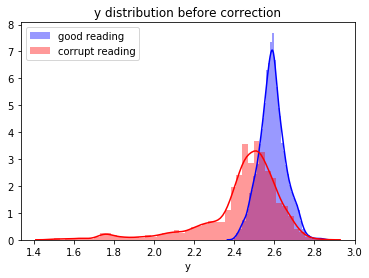

In [37]:
# compare the good y and bad y
sns.distplot( df_good["y"] , color="blue", label="good reading")
sns.distplot( df_bad["y"],   color="red",  label="corrupt reading")
plt.title("y distribution before correction")
plt.legend();

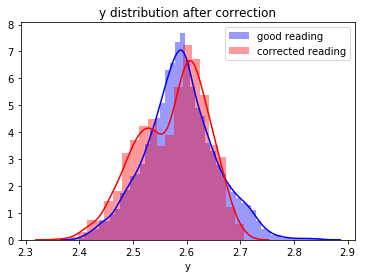

In [38]:
# after using our model, the bad data is replaced by predicted compare the good y and bad y
sns.distplot( df_good["y"] , color="blue", label="good reading")
sns.distplot( y_final,       color="red",  label="corrected reading")
plt.title("y distribution after correction")
plt.legend();

In [35]:
# check the z_score to see if two mean ARE equal

from scipy import stats
from statsmodels.stats import weightstats as stests
z_score,p_val = stests.ztest(df_good["y"], y_final, value=0, alternative='two-sided')

print(z_score, p_val)
if p_val<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
# we cannot conclude that: the misreading values y have the same mean as the normal reading y.
# in other word, the misreading y (whihc we predicted) has a different mean

[8.40672669] [4.21612011e-17]
reject null hypothesis


### We reject the H0. Our conclusion is:
 - The corrected y values (which are originally corrupted) have a different mean from the good y values with 95% confidence.


### END